# Downloading SAMOS data from MarineFlux ERDDAP server

In [1]:
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy.ma as ma

## Create the ERDDAP request

In [2]:
extent = [280.0, 290.0, 30.0, 40.0] # [lon-, lon+, lat-, lat+]
flux_algorithms = ["S88", "B12", "C35"]

In [3]:
erddap_samos = dict()
for algo in flux_algorithms:
  erddap_samos[algo] = ERDDAP(
    server="http://erddap-samos.coaps.fsu.edu/erddap",
    protocol="tabledap",
  )

  erddap_samos[algo].dataset_id = f"SAMOS_Fluxes_{algo}"
  erddap_samos[algo].constraints = {
      "time>=": "2021-01-01T00:00:00Z",
      "time<=": "2022-01-01T00:00:00Z",
      "longitude>=": extent[0],
      "longitude<=": extent[1],
      "latitude>=": extent[2],
      "latitude<=": extent[3],
  }
  erddap_samos[algo].variables = [
      "hfls",
      "hfss",
      "tau",
  ]

### URLs for ERDDAP request can be retrieved

In [21]:
for algo in flux_algorithms:
    erddap_samos[algo].response = "csv"
    print(f'Download {algo} CSV: {erddap_samos[algo].get_download_url()}')

    erddap_samos[algo].response = "html"
    print(f'View {algo} download form on ERDDAP server: {erddap_samos[algo].get_download_url()}\n')

Download S88 CSV: http://erddap-samos.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_S88.csv?hfls,hfss,tau&time>=1609459200.0&time<=1640995200.0&longitude>=280.0&longitude<=290.0&latitude>=30.0&latitude<=40.0
View S88 download form on ERDDAP server: http://erddap-samos.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_S88.html?hfls,hfss,tau&time>=1609459200.0&time<=1640995200.0&longitude>=280.0&longitude<=290.0&latitude>=30.0&latitude<=40.0

Download B12 CSV: http://erddap-samos.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_B12.csv?hfls,hfss,tau&time>=1609459200.0&time<=1640995200.0&longitude>=280.0&longitude<=290.0&latitude>=30.0&latitude<=40.0
View B12 download form on ERDDAP server: http://erddap-samos.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_B12.html?hfls,hfss,tau&time>=1609459200.0&time<=1640995200.0&longitude>=280.0&longitude<=290.0&latitude>=30.0&latitude<=40.0

Download C35 CSV: http://erddap-samos.coaps.fsu.edu/erddap/tabledap/SAMOS_Fluxes_C35.csv?hfls,hfss,tau&time>=1609459200.0&time<=16

### Request data as CF compliant netCDF4-python object

In [22]:
nc = dict()

for algo in flux_algorithms:
    nc[algo] = erddap_samos[algo].to_ncCF()

    print(nc[algo])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    callsign: ZCYL5
    cdm_data_type: Point
    comment: These data are the output of bulk flux calculations done on ship observations. When redundant instruments exist, the sensors used for calculations are chosen based on the amount of good data available, determined on a per day basis. Attributes in the daily output .nc files indicate which sensors are used.
    Conventions: COARDS, CF-1.6, ACDD-1.3
    creator_name: Center for Ocean-Atmospheric Prediction Studies, The Florida State University, Tallahassee, FL, 32306-2840, USA
    creator_type: group
    creator_url: https://rda.ucar.edu/datasets/ds260.4/
    DIR_sensor_used: DIR3
    Easternmost_Easting: 290.0
    featureType: Point
    flux_code: S88
    Flux_code_info: S88
    geospatial_lat_max: 40.0
    geospatial_lat_min: 30.0
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 290.0
    geospatial_lon_min: 280.0
    g

## Request data as pandas DataFrame

In [5]:
df = dict()

for algo in flux_algorithms:
    df[algo] = erddap_samos[algo].to_pandas()

    print(df[algo])

        hfls (watts meter-2)  hfss (watts meter-2)  tau (newton meter-2)
0                        NaN                   NaN                   NaN
1                        NaN                   NaN                   NaN
2                        NaN                   NaN                   NaN
3                        NaN                   NaN                   NaN
4                        NaN                   NaN                   NaN
...                      ...                   ...                   ...
236488            160.313097             20.650944              0.064004
236489            151.599631             19.377516              0.058034
236490            158.456686             20.527104              0.059056
236491            158.751739             20.543149              0.065373
236492            155.547741             19.649620              0.061390

[236493 rows x 3 columns]
        hfls (watts meter-2)  hfss (watts meter-2)  tau (newton meter-2)
0                       

## Request data as xarray Dataset

In [6]:
ds = dict()

for algo in flux_algorithms:
    ds[algo] = erddap_samos[algo].to_xarray()

    print(ds[algo])

<xarray.Dataset>
Dimensions:    (row: 236493)
Coordinates:
    longitude  (row) float32 ...
    latitude   (row) float32 ...
    time       (row) datetime64[ns] ...
Dimensions without coordinates: row
Data variables:
    hfls       (row) float64 ...
    hfss       (row) float64 ...
    tau        (row) float64 ...
Attributes: (12/43)
    callsign:                  ZCYL5
    cdm_data_type:             Point
    comment:                   These data are the output of bulk flux calcula...
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    creator_name:              Center for Ocean-Atmospheric Prediction Studie...
    creator_type:              group
    ...                        ...
    T_sensor_used:             T
    time_coverage_end:         2021-11-05T04:12:00Z
    time_coverage_start:       2021-02-19T06:07:00Z
    title:                     SAMOS MarineFlux S88
    TS_sensor_used:            TS
    Westernmost_Easting:       280.0
<xarray.Dataset>
Dimensions:    (row: 23

### Simple plot of latent heat flux

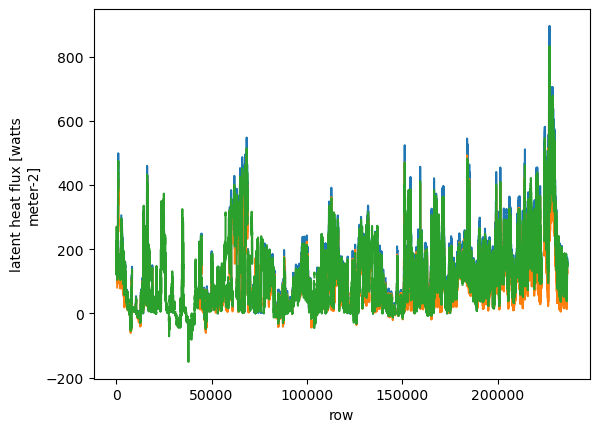

In [7]:
for algo in flux_algorithms:
    ds[algo]['hfls'].plot()

### Latent heat flux plotted as a function of time

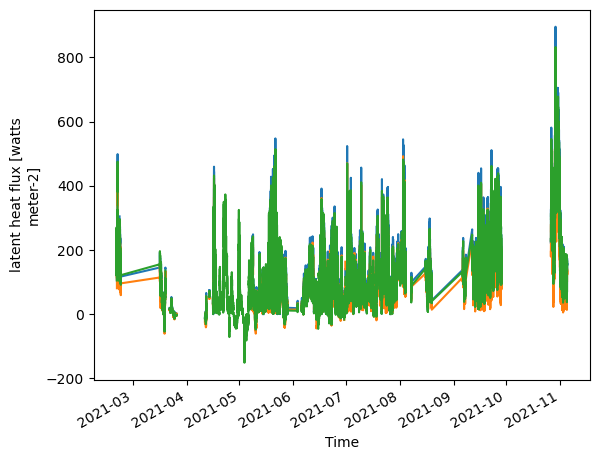

In [8]:
for algo in flux_algorithms:
    ds[algo]['hfls'].plot(x='time')

### Sensible and latent heat fluxes plotted on a map

In [11]:
def plot_shared_colorbar(dataset, vars, cmap='bwr', diverging=True, sort=False):
    height = 4
    figsize = (len(vars) * height, height)
    fig = plt.figure(figsize=figsize, layout='constrained')
    fig.suptitle(dataset.title)

    projection = ccrs.PlateCarree()

    ax_dict = fig.subplot_mosaic(
        [
            vars,
            ['cbar' for var in vars]
        ],
        height_ratios=[20, 1],
        per_subplot_kw={
            tuple(vars): {'projection': projection}
        }
    )

    vmax = -1
    for var in vars:
        ax_dict[var].set_extent(extent, crs=projection)
        ax_dict[var].stock_img()
        ax_dict[var].coastlines()
        ax_dict[var].set_title(f'{dataset[var].long_name} ({dataset[var].units})')

        vmax = max(vmax, ma.max(abs(ma.masked_invalid(ds[algo][var]))))

    if diverging:
        vmin = -vmax
    else:
        vmin = 0

    scatter = []
    for var in vars:
        # sorting the DataArray before plotting makes the higher values show up on top. this is useful for seeing where the high values are, but obscures the negative values.
        if sort:
            da = dataset[var].sortby(dataset[var])
        else:
            da = dataset[var]
        scatter.append(ax_dict[var].scatter(x=da['longitude'], y=da['latitude'], c=da, cmap=cmap, vmin=vmin, vmax=vmax))

    cbar = plt.colorbar(scatter[0], cax=ax_dict['cbar'], orientation='horizontal')

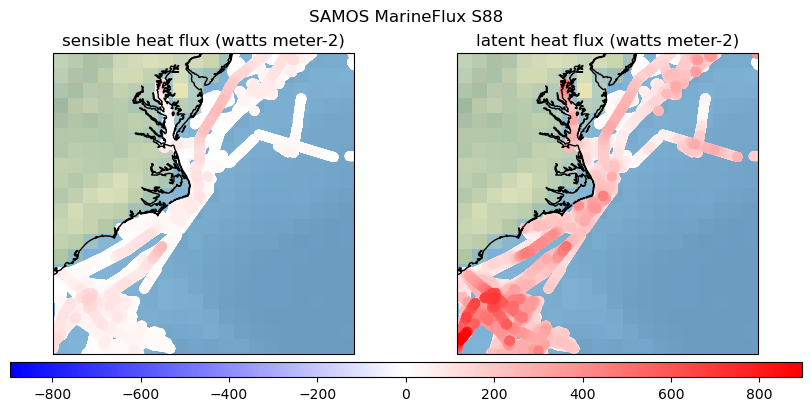

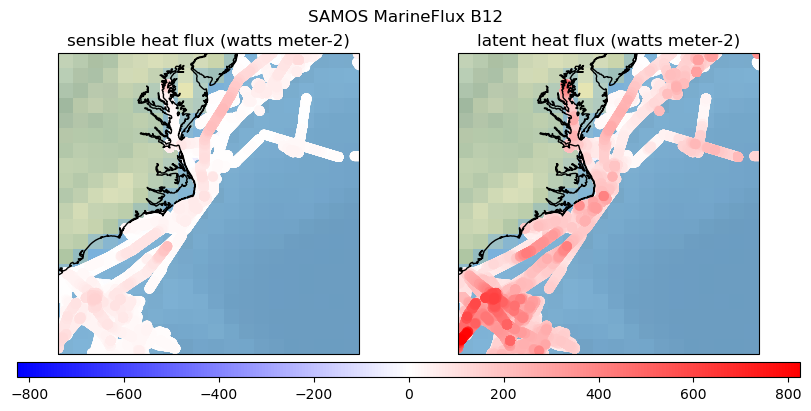

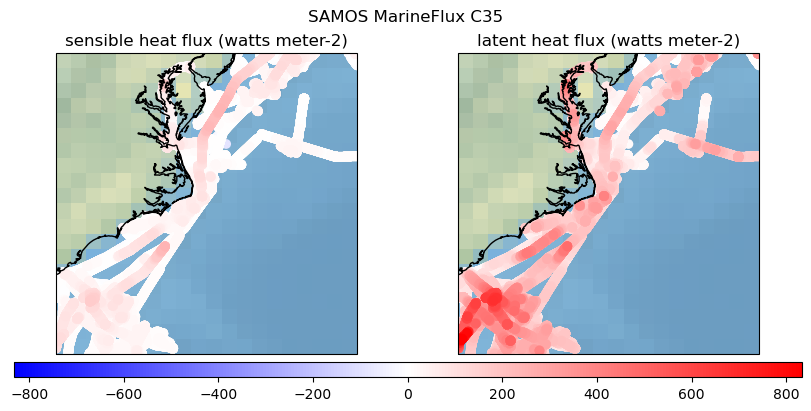

In [12]:
for algo in flux_algorithms:
    plot_shared_colorbar(ds[algo], ['hfss', 'hfls'], sort=True)

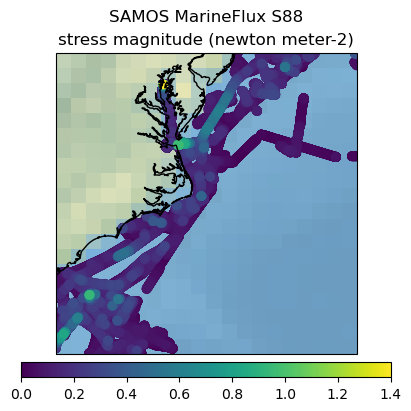

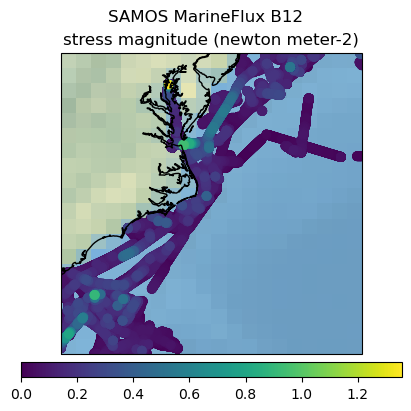

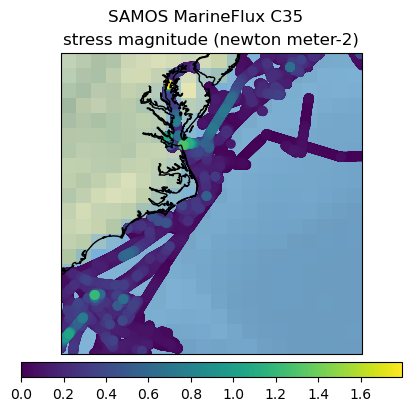

In [13]:
for algo in flux_algorithms:
    plot_shared_colorbar(ds[algo], ['tau'], cmap='viridis', diverging=False, sort=True)

In [17]:
def plot_dataset_comparison(datasets, var, sort=False, cmap='bwr', diverging=True):
    keys = list(datasets.keys())
    height = 4
    figsize = (len(datasets) * height, height)
    fig = plt.figure(figsize=figsize, layout='constrained')
    fig.suptitle(f'{ds[keys[0]][var].long_name} ({ds[keys[0]][var].units})')

    projection = ccrs.PlateCarree()

    ax_dict = fig.subplot_mosaic(
        [
            [algo for algo in keys],
            ['cbar' for algo in keys]
        ],
        height_ratios=[20, 1],
        per_subplot_kw={
            tuple(algo for algo in keys): {'projection': projection}
        }
    )

    vmax = -1
    for algo in keys:
            
        ax_dict[algo].set_extent(extent, crs=projection)
        ax_dict[algo].stock_img()
        ax_dict[algo].coastlines()
        ax_dict[algo].set_title(f'{datasets[algo][var].long_name} ({datasets[algo][var].units})')

        vmax = max(vmax, ma.max(abs(ma.masked_invalid(datasets[algo][var]))))

        ax_dict[algo].set_title(datasets[algo].title)

    if diverging:
        vmin = -vmax
    else:
        vmin = 0

    scatter = []
    for algo in keys:
        # sorting the DataArray before plotting makes the higher values show up on top. this is useful for seeing where the high values are, but obscures the negative values.
        if sort:
            da = datasets[algo][var].sortby(datasets[algo][var])
        else:
            da = datasets[algo][var]
        scatter.append(ax_dict[algo].scatter(x=da['longitude'], y=da['latitude'], c=da, cmap=cmap, vmin=vmin, vmax=vmax))

    cbar = plt.colorbar(scatter[0], cax=ax_dict['cbar'], orientation='horizontal')

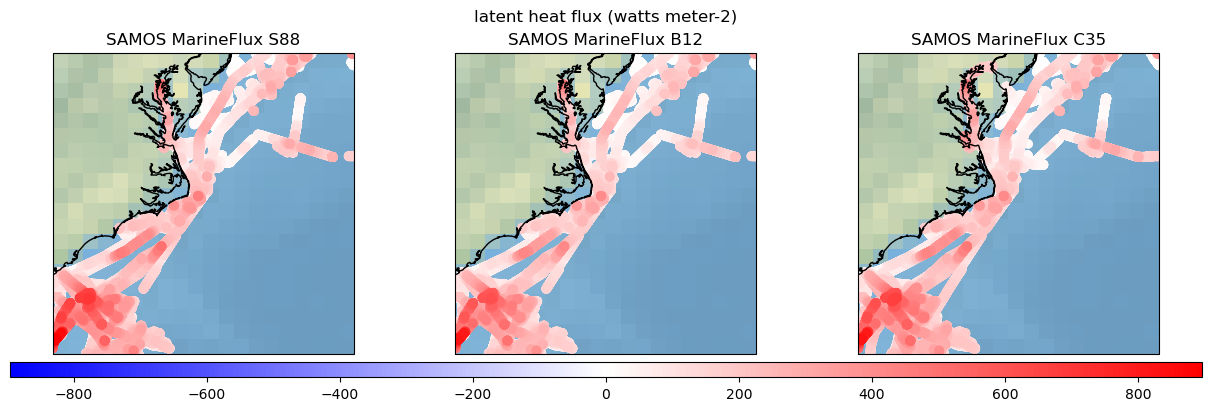

In [18]:
plot_dataset_comparison(ds, 'hfls', sort=True)

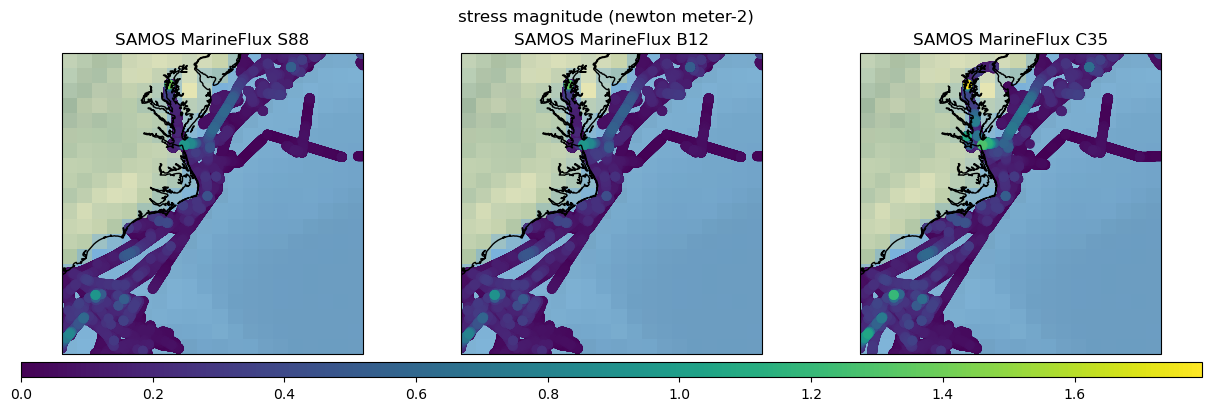

In [19]:
plot_dataset_comparison(ds, 'tau', cmap='viridis', diverging=False, sort=True)